# Lab 09 XOR - Logistic Regression - Eager Excuetion
* XOR 문제를 Logistic Regression을 활용해 문제 해결

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.3.0


### Data

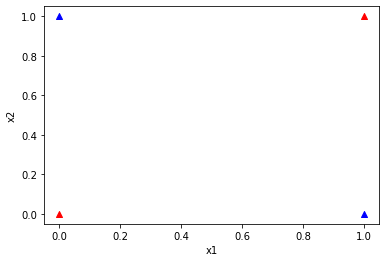

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [13]:
W1 = tf.Variable(tf.random.normal((2, 1)), name = 'weight1')
b1 = tf.Variable(tf.random.normal((1, )), name = 'bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name = 'weight2')
b2 = tf.Variable(tf.random.normal((1, )), name = 'bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name = 'weight3')
b3 = tf.Variable(tf.random.normal((1, )), name = 'bias3')

def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.reshape(tf.concat([layer1, layer2], -1), shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_func(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1-labels) * tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_func(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_func(neural_net(features), labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [15]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, W3, b1, b2, b3]))
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_func(neural_net(features),labels)))
            
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_func(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6902
Iter: 1000, Loss: 0.6893
Iter: 2000, Loss: 0.6881
Iter: 3000, Loss: 0.6863
Iter: 4000, Loss: 0.6837
Iter: 5000, Loss: 0.6798
Iter: 6000, Loss: 0.6741
Iter: 7000, Loss: 0.6658
Iter: 8000, Loss: 0.6540
Iter: 9000, Loss: 0.6377
Iter: 10000, Loss: 0.6155
Iter: 11000, Loss: 0.5859
Iter: 12000, Loss: 0.5485
Iter: 13000, Loss: 0.5040
Iter: 14000, Loss: 0.4546
Iter: 15000, Loss: 0.4039
Iter: 16000, Loss: 0.3550
Iter: 17000, Loss: 0.3104
Iter: 18000, Loss: 0.2711
Iter: 19000, Loss: 0.2375
Iter: 20000, Loss: 0.2091
Iter: 21000, Loss: 0.1852
Iter: 22000, Loss: 0.1652
Iter: 23000, Loss: 0.1483
Iter: 24000, Loss: 0.1340
Iter: 25000, Loss: 0.1218
Iter: 26000, Loss: 0.1114
Iter: 27000, Loss: 0.1024
Iter: 28000, Loss: 0.0946
Iter: 29000, Loss: 0.0878
Iter: 30000, Loss: 0.0818
Iter: 31000, Loss: 0.0765
Iter: 32000, Loss: 0.0718
Iter: 33000, Loss: 0.0675
Iter: 34000, Loss: 0.0638
Iter: 35000, Loss: 0.0603
Iter: 36000, Loss: 0.0572
Iter: 37000, Loss: 0.0544
Iter: 38000, Loss: 0.0519